# Correlation between images

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from utils.tr_color_2_gr_scale import tr_2_gr_scale
from tensorflow import keras

In [2]:
img_1 = plt.imread('images/image1_.jpg')
img_2 = plt.imread('images/image2_.jpg')
img_1 = tr_2_gr_scale(img_1)
img_2 = tr_2_gr_scale(img_2)

In [3]:
from correlation.correlation_measures import Correlation

In [4]:
Correlation.pearson(img_1,img_2)

0.1380518092325547

# Search for first n similar images

### Getting data ready

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [17]:
# Similar plane images `index or label 0 is for plane category -- 
# see the dataset documentation for more information :https://www.cs.toronto.edu/~kriz/cifar.html`.
similar_images = np.where(y_train == 0)

In [7]:
ix_of_similar_images = similar_images[0]
# The indices for similar images that belongs to the same class/category
ix_of_similar_images

array([   29,    30,    35, ..., 49941, 49992, 49994], dtype=int64)

In [8]:
X_train[ix_of_similar_images];

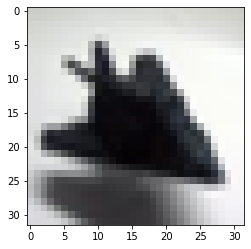

In [9]:
plt.imshow(X_train[ix_of_similar_images][0])
plt.show()

In [10]:
from utils.split_nbr import split_nbr
from utils.max_val_dict import max_val_dict
from visualize.display import display_similar_images
from search.similar import search_n_similar_images

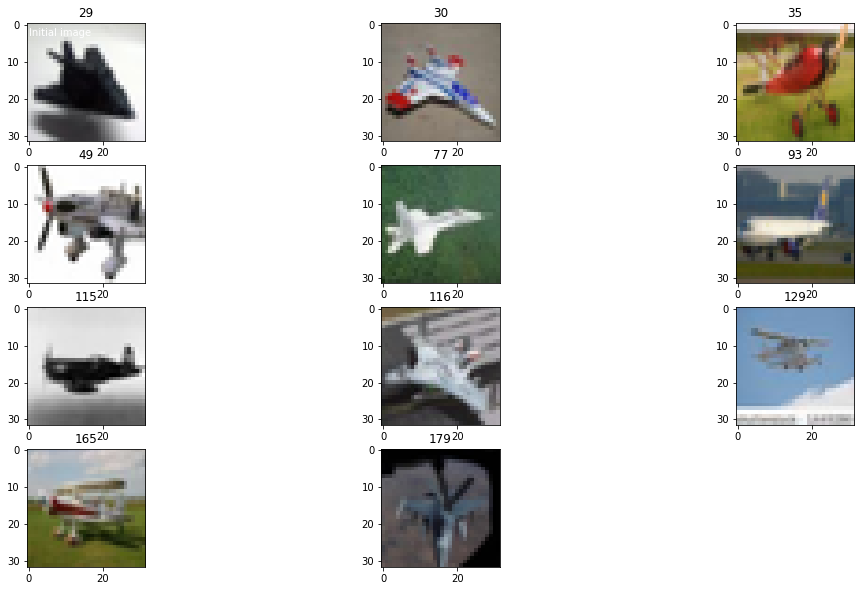

In [11]:
display_similar_images(X_train[ix_of_similar_images], ix_of_similar_images, 11)

In [12]:
# Let's compute the pearson correlation between two plans and check the value of its correlation
plan_0 = X_train[ix_of_similar_images][0]
plan_6 = X_train[ix_of_similar_images][6]
Correlation.pearson(plan_0, plan_6)

0.4963244205252272

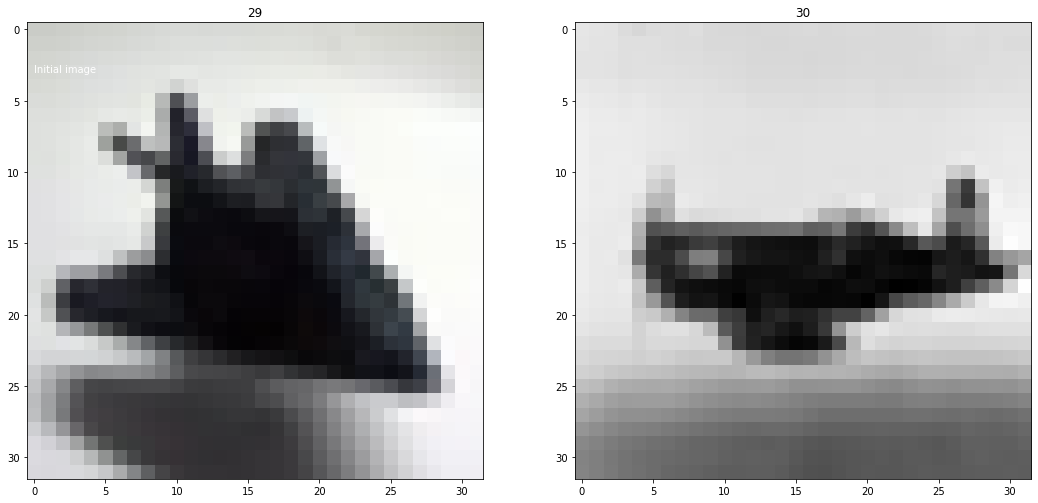

In [13]:
# Tow images are correlated and are 50% similar as we can see
two_similar_plane = []
two_similar_plane.append(X_train[ix_of_similar_images][0])
two_similar_plane.append(X_train[ix_of_similar_images][6])

display_similar_images(two_similar_plane, ix_of_similar_images, 2)

In [14]:
# Do not run multiple times as it takes some time ahead.
n_first_similar_images = 20
images = X_train
image = X_train[0]

similar_images, spearman_n_values = search_n_similar_images(images, image, n_first_similar_images)

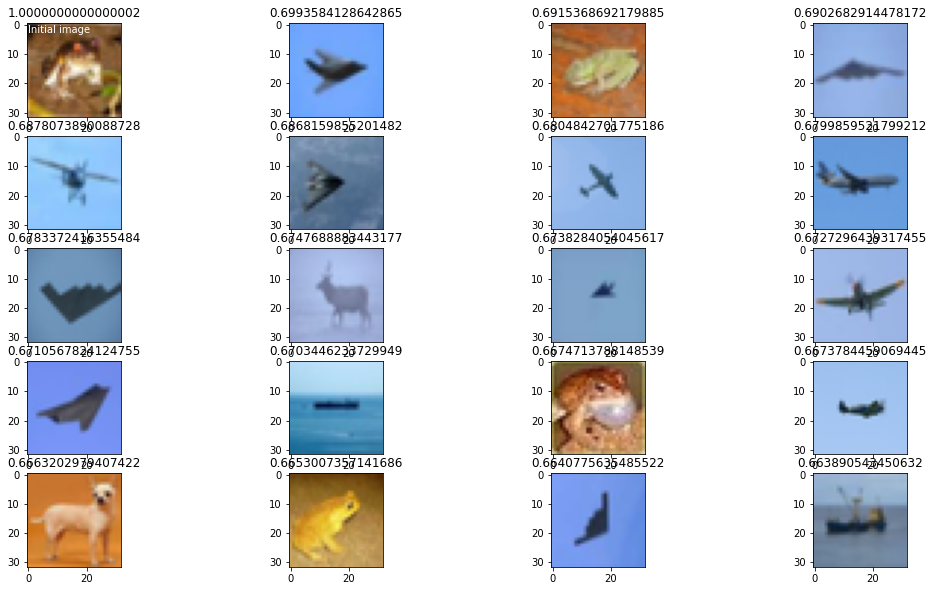

In [15]:
# Show the similar image in a figure 
display_similar_images(similar_images, spearman_n_values, n_first_similar_images)